# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
endpoint = f"https://api.openweathermap.org/data/2.5/weather?q=port-gentil&appid={weather_api_key}"

# endpoint = f"https://api.openweathermap.org/data/2.5/weather?q={'kodiak'}&appid={'api_key_number######'}"
city_weather = requests.get(endpoint).json()

In [4]:
city_weather

{'coord': {'lon': 8.7815, 'lat': -0.7193},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 297.13,
  'feels_like': 297.88,
  'temp_min': 297.13,
  'temp_max': 297.13,
  'pressure': 1012,
  'humidity': 88},
 'visibility': 8000,
 'wind': {'speed': 5.66, 'deg': 180},
 'clouds': {'all': 20},
 'dt': 1692741257,
 'sys': {'type': 1,
  'id': 2188,
  'country': 'GA',
  'sunrise': 1692681917,
  'sunset': 1692725452},
 'timezone': 3600,
 'id': 2396518,
 'name': 'Port-Gentil',
 'cod': 200}

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []
City=[]
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]
    
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        City.append(city)
        Lat.append(city_lat)
        Lng.append(city_lng)
        Max_Temp.append(city_max_temp)
        Humidity.append(city_humidity)
        Cloudiness.append(city_clouds)
        Wind_Speed.append(city_wind)
        Country.append(city_country)
        Date.append(city_date)
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | jabat
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | pacific grove
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | ola
Processing Record 9 of Set 1 | crane
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | rockingham
Processing Record 12 of Set 1 | haiku-pauwela
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | sisimiut
Processing Record 15 of Set 1 | belmonte
Processing Record 16 of Set 1 | yemva
Processing Record 17 of Set 1 | newman
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | ushuaia
Processing Reco

In [6]:
City

['blackmans bay',
 'jabat',
 'waitangi',
 'pacific grove',
 'ust-nera',
 'hermanus',
 'lompoc',
 'ola',
 'crane',
 'grytviken',
 'rockingham',
 'haiku-pauwela',
 'papatowai',
 'sisimiut',
 'belmonte',
 'yemva',
 'newman',
 'new norfolk',
 'edinburgh of the seven seas',
 'vorgashor',
 'port-aux-francais',
 'ushuaia',
 'ta`u',
 'fenoarivo atsinanana',
 'labytnangi',
 'tiksi',
 'la passe',
 'albany',
 'west island',
 'tsiombe',
 'ngerengere',
 'puerto natales',
 'jamestown',
 'iqaluit',
 'yulinshi',
 'hithadhoo',
 'bethel',
 'adamstown',
 'olonkinbyen',
 'invercargill',
 'codrington',
 'tidjikja',
 "n'zeto",
 'baglung',
 'sirnach',
 'kalevala',
 'tsetserleg',
 'carutapera',
 'lesosibirsk',
 "parabel'",
 'pitea',
 'turkmenbasy',
 'bilibino',
 'tazovsky',
 'avarua',
 'barra da estiva',
 'razole',
 'margaret river',
 'kidal',
 'port elizabeth',
 'dudinka',
 "arkhangel'sk",
 'kodiak',
 'tahe',
 'port lincoln',
 'hamilton',
 'alto araguaia',
 'hawaiian paradise park',
 'warwick',
 'georgetown'

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": City, 
    "Lat": Lat, 
    "Lng": Lng, 
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date
})
# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,8.74,74,71,3.52,AU,1692741265
1,jabat,7.7500,168.9751,29.01,71,83,4.22,MH,1692741266
2,waitangi,-43.9535,-176.5597,10.46,78,89,3.58,NZ,1692741266
3,pacific grove,36.6177,-121.9166,27.16,75,0,5.14,US,1692741268
4,ust-nera,64.5667,143.2000,6.18,98,100,2.04,RU,1692741269


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,8.74,74,71,3.52,AU,1692741265
1,jabat,7.7500,168.9751,29.01,71,83,4.22,MH,1692741266
2,waitangi,-43.9535,-176.5597,10.46,78,89,3.58,NZ,1692741266
3,pacific grove,36.6177,-121.9166,27.16,75,0,5.14,US,1692741268
4,ust-nera,64.5667,143.2000,6.18,98,100,2.04,RU,1692741269


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

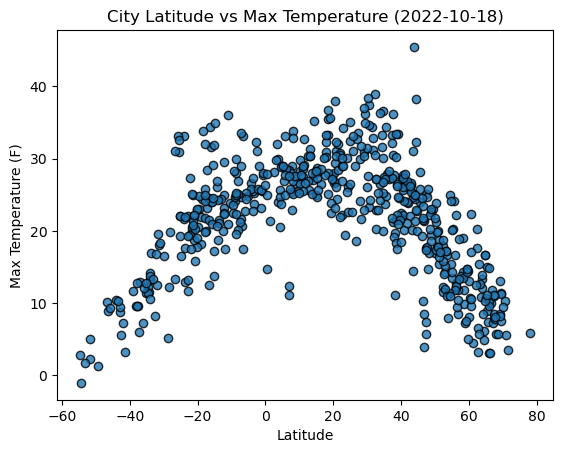

In [13]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

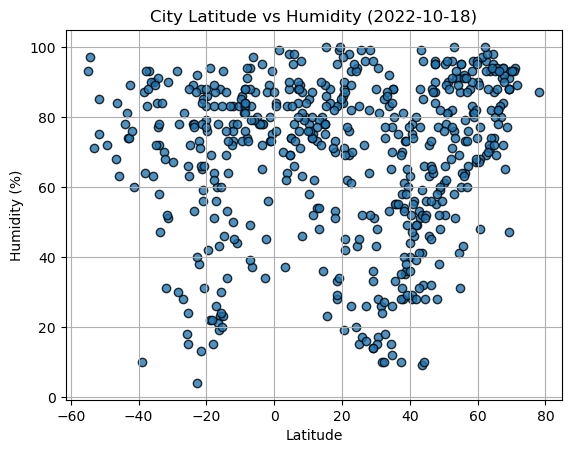

In [14]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

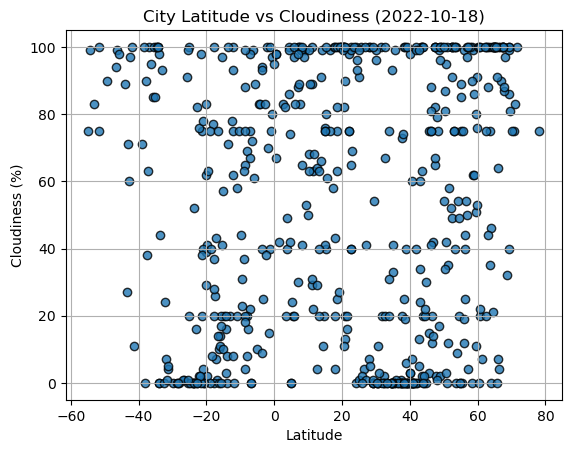

In [15]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

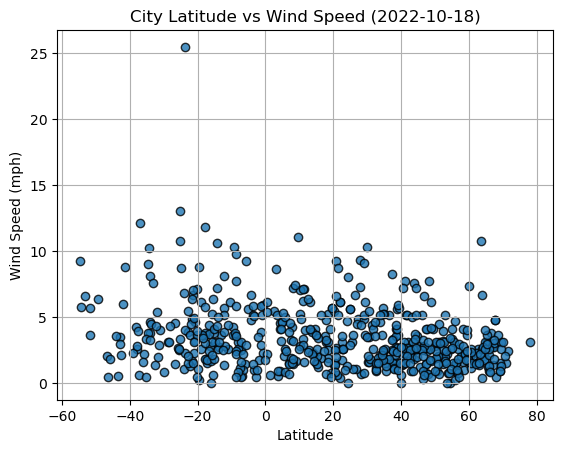

In [16]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    plt.scatter(x_values, y_values, linewidth=1)
    plt.plot(x_values,regress_values,color='r')
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.annotate(line_eq, text_coordinates, color="red")

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jabat,7.7500,168.9751,29.01,71,83,4.22,MH,1692741266
3,pacific grove,36.6177,-121.9166,27.16,75,0,5.14,US,1692741268
4,ust-nera,64.5667,143.2000,6.18,98,100,2.04,RU,1692741269
6,lompoc,34.6391,-120.4579,30.08,70,0,5.66,US,1692741270
7,ola,59.5833,151.2833,14.66,67,51,3.62,RU,1692741271


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,8.74,74,71,3.52,AU,1692741265
2,waitangi,-43.9535,-176.5597,10.46,78,89,3.58,NZ,1692741266
5,hermanus,-34.4187,19.2345,11.56,77,100,10.26,ZA,1692741269
9,grytviken,-54.2811,-36.5092,-1.06,97,99,5.76,GS,1692741272
12,papatowai,-46.5619,169.4708,10.16,68,94,2.02,NZ,1692741274


###  Temperature vs. Latitude Linear Regression Plot

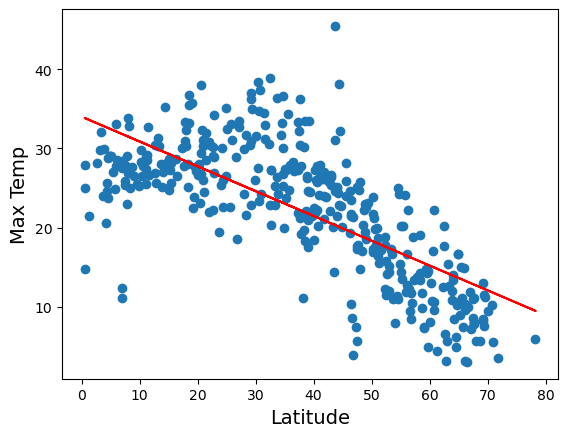

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern", (5, 0))

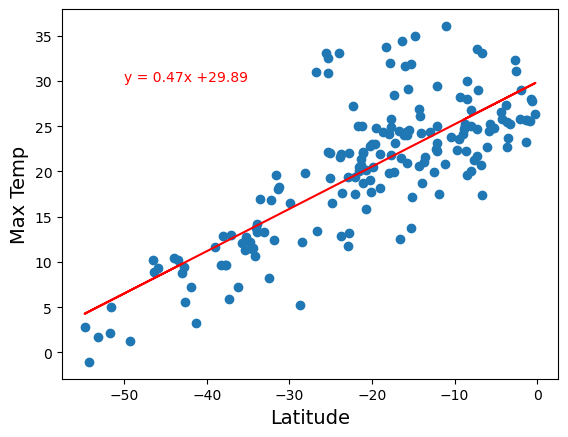

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern", (-50, 30))

**Discussion about the linear relationship:** When you head north on the map, temperatures usually drop. On the flip side, moving south often brings higher temperatures.

### Humidity vs. Latitude Linear Regression Plot

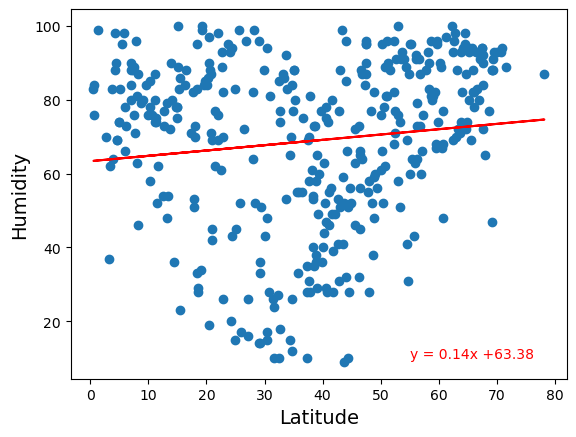

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Northern",(55,10))

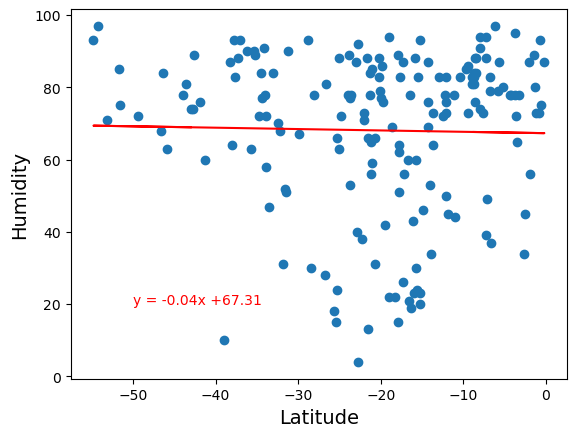

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Southern",(-50, 20))

**Discussion about the linear relationship:** It seems like Latitude and Humidity don't really have much of a connection.

### Cloudiness vs. Latitude Linear Regression Plot

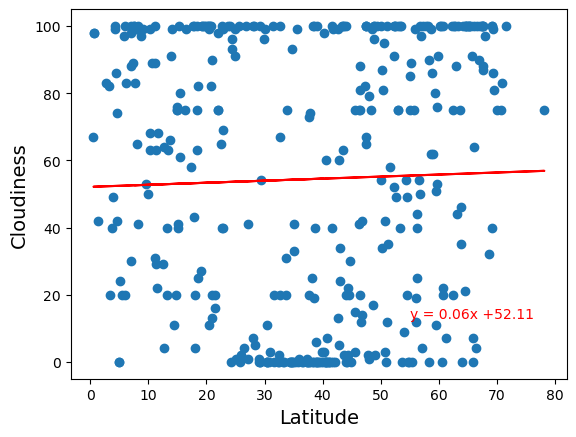

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (55, 13))

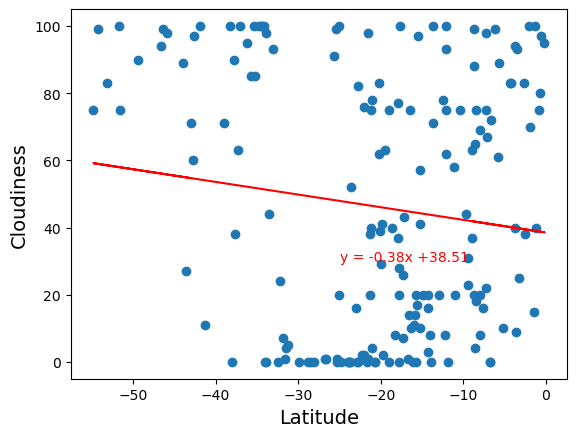

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern",(-25, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

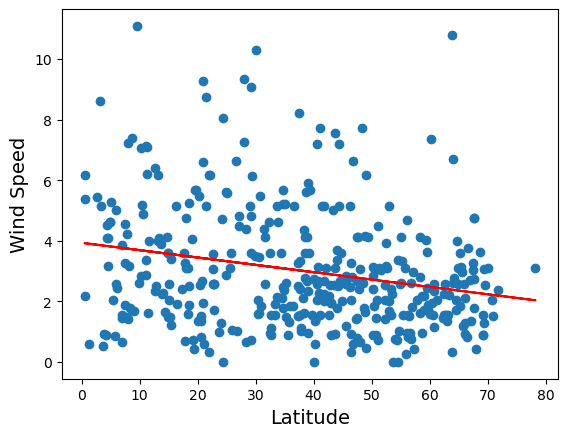

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern",(10, 12))

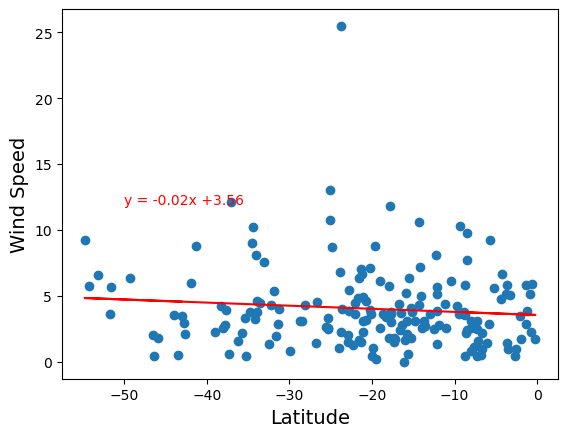

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Southern",(-50, 12))

**Discussion about the linear relationship:** From the regression analysis we did, it's pretty clear that Wind Speed and Latitude don't really have much of a connection in both hemispheres. Like, they're just doing their own thing without bothering each other.